# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, 
                  centers=4, 
                  n_features=2, 
                  cluster_std=[1, 1.5, 2, 2], 
                  random_state=7
)

df_blobs = pd.DataFrame(
    {
        'x1': x[:,0],
        'x2': x[:,1],
        'y': y
    }
)

In [3]:
def plot_2d_clusters(x, y, ax):
    
    y_uniques = pd.Series(y).unique()
    
    for y_unique_item in y_uniques:
        x[
            y == y_unique_item
        ].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker=f'${y_unique_item}$',
            s=60,
            color='k',
            ax=ax,
            alpha=0.7
        )

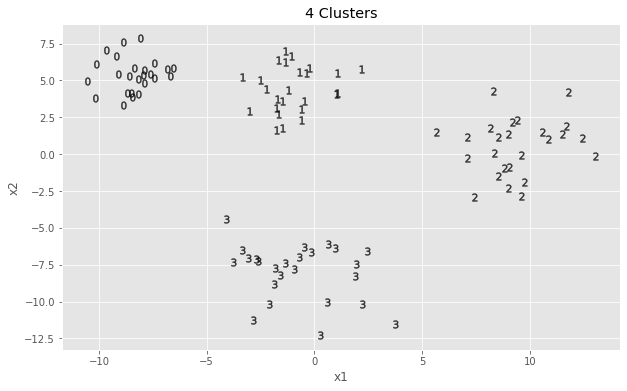

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharey=False)

x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x, y, ax)

# Clustering with K-means

In [5]:
x, y = df_blobs[['x1', 'x2']], df_blobs['y']

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=7)
y_pred = km.fit_predict(x)

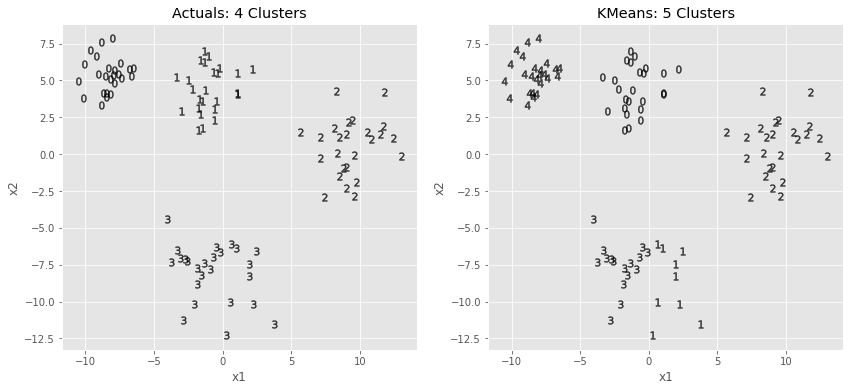

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

plot_2d_clusters(x, y, axs[0])
plot_2d_clusters(x, y_pred, axs[1])

axs[0].set_title(f'Actuals: {axs[0].get_title()}')
axs[1].set_title(f'KMeans: {axs[1].get_title()}')

print('')


# What is the right number of clusters?

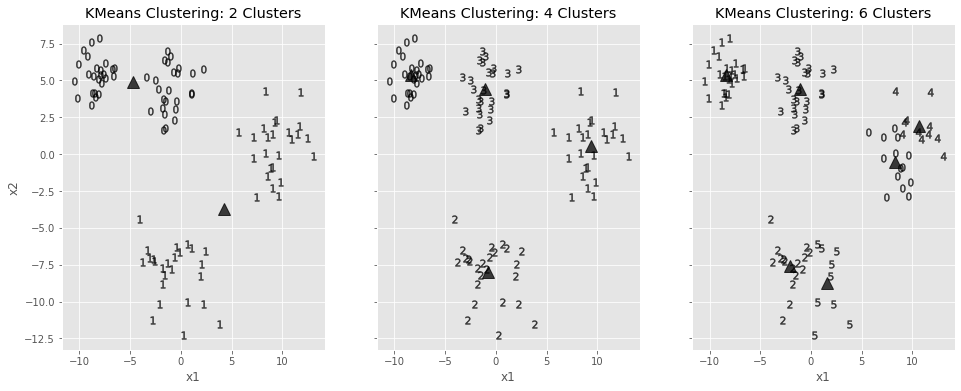

In [8]:
from sklearn.cluster import KMeans

n_clusters_options = [2, 4, 6]

fig, axs = plt.subplots(1, len(n_clusters_options), figsize=(16, 6), sharex=True, sharey=True)

for i, n_clusters in enumerate(n_clusters_options):
    
    x, y = df_blobs[['x1', 'x2']], df_blobs['y']

    kmeans = KMeans(n_clusters=n_clusters, random_state=7)
    y_pred = kmeans.fit_predict(x)
    
    plot_2d_clusters(x, y_pred, axs[i])
    
    axs[i].plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'k^', ms=12, alpha=0.75)
    axs[i].set_title(f'KMeans Clustering: {axs[i].get_title()}')